In [55]:
#depression anxiety
!gdown --id "1Jj6-4mKIi12jyLyKXQWSoMaPGAUqucSP"

#depression anxiety countries
!gdown --id "12-4nCr5mI2kyoRP1Hm78sQ2mlE5nUn9w"

#internet
!gdown --id "1D6CxGFuwo7SqGpG2ig-GyXaiGdAEYUMt"

#global social media
!gdown --id "1BqFZ5qivC6DkmNiKa3oqb0mIcirnXJsX"

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Jj6-4mKIi12jyLyKXQWSoMaPGAUqucSP
To: /content/depression_anxiety_data.xlsx
100% 29.1k/29.1k [00:00<00:00, 38.3MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=12-4nCr5mI2kyoRP1Hm78sQ2mlE5nUn9w
To: /content/depression_anxiety_data_countries.xlsx
100% 669k/669k [00:00<00:00, 70.7MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnin

#Loading the datasets

In [112]:
#First, load the datasets and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data_global = pd.read_excel("depression_anxiety_data.xlsx")
data_countries = pd.read_excel("depression_anxiety_data_countries.xlsx")
data_internet = pd.read_excel("share_of_individuals_using_the_internet.xlsx")
data_social_media = pd.read_excel("social_media_2012_2014.xlsx")

#remove irrelevant columns
data_global = data_global.drop("sex",axis=1)
data_countries = data_countries.drop("sex",axis=1)


#Depression and Anxiety vs Internet Usage

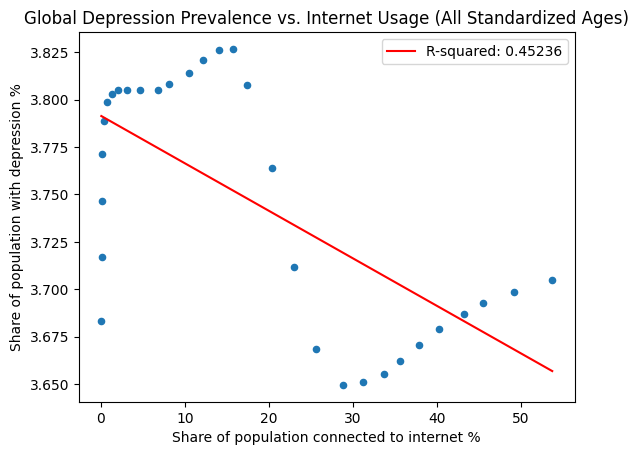

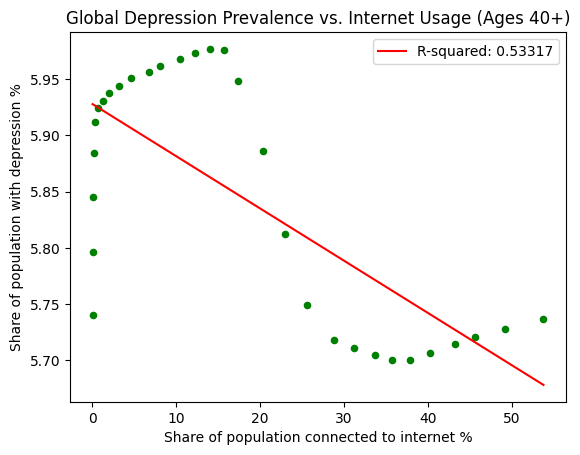

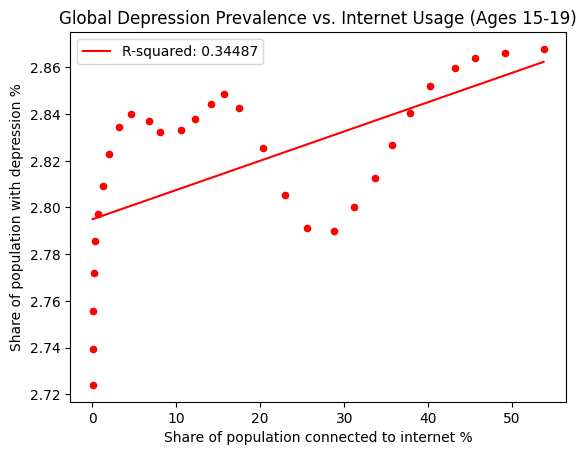

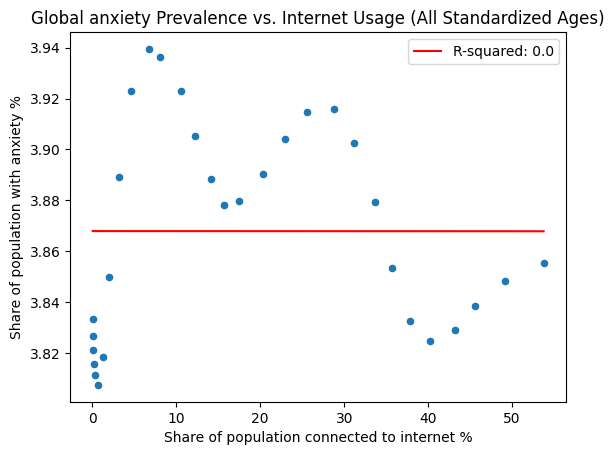

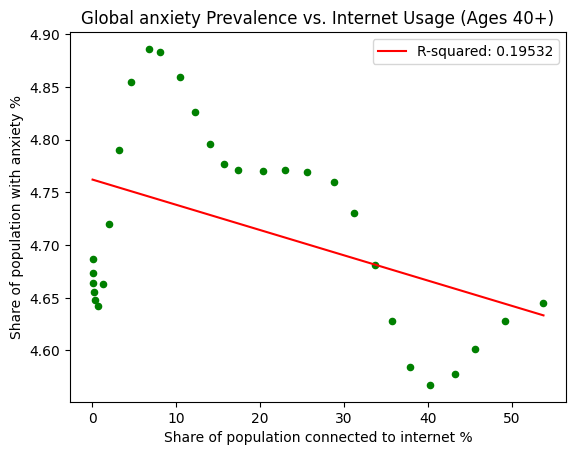

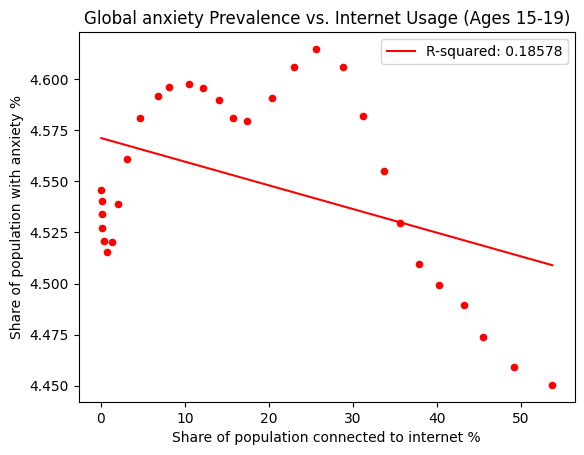

In [128]:
#define filters for use with data_global
age_youth = data_global["age"] == "<20 years"
age_all = data_global["age"] == "Age-standardized"
age_10_14 = data_global["age"] == "10-14 years"
age_15_19 = data_global["age"] == "15-19 years"
age_20_24 = data_global["age"] == "20-24 years"
age_25_29 = data_global["age"] == "25-29 years"
age_30_34 = data_global["age"] == "30-34 years"
age_35_39 = data_global["age"] == "35-39 years"
age_40_44 = data_global["age"] == "40-44 years"
age_45_49 = data_global["age"] == "45-49 years"
age_50_69 = data_global["age"] == "50-69 years"
age_70_plus = data_global["age"] == "70+ years"
#age 40-70+
age_old = age_40_44 | age_45_49 | age_50_69 | age_70_plus
non_covid = (data_global["year"] != 2020) & (data_global["year"] != 2021)

#first, let's plot global prevalence and internet usage, for both all ages and the youth
combined_all = pd.merge(data_global[age_all & non_covid], data_internet, on=["location","year"])
combined_youth = pd.merge(data_global[age_youth & non_covid], data_internet, on=["location","year"])
combined_15_19 = pd.merge(data_global[age_15_19 & non_covid], data_internet, on=["location","year"])
combined_old = pd.merge(data_global[age_old & non_covid], data_internet, on=["location","year"])

combined_old = combined_old.groupby(["location","year", "internet %"])[["depression %","anxiety %"]].mean().reset_index()


#Function to create a linear regression model and plot it
def plot_linear(x,y):
  model = LinearRegression()
  model.fit(x,y)
  y_pred = model.predict(x)
  r_squared = round(model.score(x, y),5)
  plt.plot(x, y_pred, color='red', label = "R-squared: " + str(r_squared))

##########################DEPRESSION##########################
#plot all ages
combined_all.plot.scatter(x='internet %',y='depression %')
plt.xlabel("Share of population connected to internet %")
plt.ylabel("Share of population with depression %")
plt.title("Global Depression Prevalence vs. Internet Usage (All Standardized Ages)")

#fit models
x = combined_all[["internet %"]]
y = combined_all[["depression %"]]
plot_linear(x,y)
plt.legend()

#plot old (ages 40-70+)
combined_old.plot.scatter(x='internet %',y='depression %', color="green")
plt.xlabel("Share of population connected to internet %")
plt.ylabel("Share of population with depression %")
plt.title("Global Depression Prevalence vs. Internet Usage (Ages 40+)")

#fit models
x = combined_old[["internet %"]]
y = combined_old[["depression %"]]
plot_linear(x,y)
plt.legend()

#plot teenagers (ages 15-19)
combined_15_19.plot.scatter(x='internet %',y='depression %', color="red")
plt.xlabel("Share of population connected to internet %")
plt.ylabel("Share of population with depression %")
plt.title("Global Depression Prevalence vs. Internet Usage (Ages 15-19)")

#fit models
x = combined_15_19[["internet %"]]
y = combined_15_19[["depression %"]]
plot_linear(x,y)
plt.legend()

##########################ANXIETY##########################
#plot all ages
combined_all.plot.scatter(x='internet %',y='anxiety %')
plt.xlabel("Share of population connected to internet %")
plt.ylabel("Share of population with anxiety %")
plt.title("Global anxiety Prevalence vs. Internet Usage (All Standardized Ages)")

#fit models
x = combined_all[["internet %"]]
y = combined_all[["anxiety %"]]
plot_linear(x,y)
plt.legend()

#plot old (ages 40-70+)
combined_old.plot.scatter(x='internet %',y='anxiety %', color="green")
plt.xlabel("Share of population connected to internet %")
plt.ylabel("Share of population with anxiety %")
plt.title("Global anxiety Prevalence vs. Internet Usage (Ages 40+)")

#fit models
x = combined_old[["internet %"]]
y = combined_old[["anxiety %"]]
plot_linear(x,y)
plt.legend()

#plot teenagers (ages 15-19)
combined_15_19.plot.scatter(x='internet %',y='anxiety %', color="red")
plt.xlabel("Share of population connected to internet %")
plt.ylabel("Share of population with anxiety %")
plt.title("Global anxiety Prevalence vs. Internet Usage (Ages 15-19)")

#fit models
x = combined_15_19[["internet %"]]
y = combined_15_19[["anxiety %"]]
plot_linear(x,y)
plt.legend()






plt.show()

